## Mahavia khan 21ktele0637

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'G:\8TH SEMESTER\MahaviaKhan_ML\12\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [9]:
train_dir = r'G:\8TH SEMESTER\MahaviaKhan_ML\12\Dataset\train'
validation_dir = r'G:\8TH SEMESTER\MahaviaKhan_ML\12\Dataset\validation'
test_dir = r'G:\8TH SEMESTER\MahaviaKhan_ML\12\Dataset\test'

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 128)     

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 520 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [20]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [21]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.7213
Epoch 1: val_loss improved from inf to 0.74441, saving model to G:\8TH SEMESTER\MahaviaKhan_ML\12\E1-cp-0001-loss0.74.h5
16/16 [==============================] - 43s 3s/step - loss: 0.5441 - accuracy: 0.7213 - val_loss: 0.7444 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.3233 - accuracy: 0.8607
Epoch 2: val_loss improved from 0.74441 to 0.41017, saving model to G:\8TH SEMESTER\MahaviaKhan_ML\12\E1-cp-0002-loss0.41.h5
16/16 [==============================] - 40s 2s/step - loss: 0.3233 - accuracy: 0.8607 - val_loss: 0.4102 - val_accuracy: 0.7833
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9406
Epoch 3: val_loss improved from 0.41017 to 0.33382, saving model to G:\8TH SEMESTER\MahaviaKhan_ML\12\E1-cp-0003-loss0.33.h5
16/16 [==============================] - 40s 3s/step - loss: 0.1484 - accuracy: 0.9406 - 

In [22]:
model_history.history

{'loss': [0.5440813302993774,
  0.323253333568573,
  0.14840751886367798,
  0.10295087844133377,
  0.0843823179602623,
  0.029932137578725815,
  0.029087789356708527,
  0.04817459359765053,
  0.012071522884070873,
  0.07096889615058899],
 'accuracy': [0.7213114500045776,
  0.8606557250022888,
  0.9405737519264221,
  0.9528688788414001,
  0.9692623019218445,
  0.9877049326896667,
  0.9877049326896667,
  0.9733606576919556,
  0.9979507923126221,
  0.9733606576919556],
 'val_loss': [0.7444061636924744,
  0.41017183661460876,
  0.33381780982017517,
  0.22246912121772766,
  0.10498633235692978,
  0.19070196151733398,
  0.07199797034263611,
  0.05716229975223541,
  0.05297457426786423,
  0.046285320073366165],
 'val_accuracy': [0.5,
  0.7833333611488342,
  0.8333333134651184,
  0.8999999761581421,
  0.9666666388511658,
  0.949999988079071,
  0.949999988079071,
  0.9666666388511658,
  0.9666666388511658,
  0.9666666388511658]}

In [24]:
model.save(r'G:\8TH SEMESTER\MahaviaKhan_ML\12\E1-cp-0010-loss0.05.h5')

Found 24 images belonging to 2 classes.
1/1 [==============================] - 0s 483ms/step


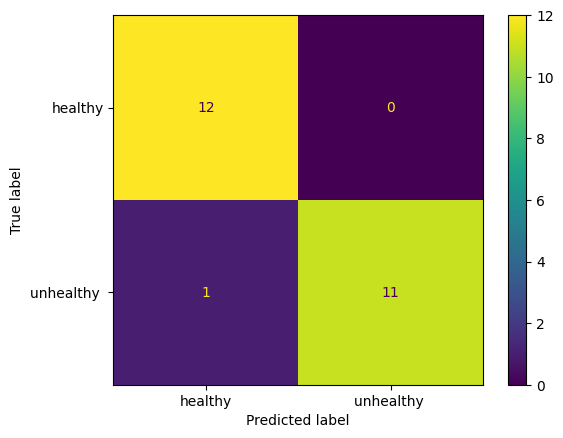

<Figure size 640x480 with 0 Axes>

In [27]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['healthy', 'unhealthy '])
disp.plot()
plt.show()
plt.savefig(r'G:\8TH SEMESTER\MahaviaKhan_ML\12\confusion_matrics.jpg')

In [26]:
print(classification_report(label, pred, target_names=['healthy', 'unhealthy ']))

              precision    recall  f1-score   support

     healthy       0.92      1.00      0.96        12
  unhealthy        1.00      0.92      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

